In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.optim as optim


In [145]:
iris = load_iris()

In [146]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [147]:
X = iris['data']
y = iris['target']
class_n = iris['target_names']
feature_n = iris['feature_names']

In [148]:
y_df = pd.DataFrame({'class_num':y})
y_cat = {i:f'{n}' for i, n in enumerate(class_n)}
y_cat

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [149]:
y_df = y_df['class_num'].map(y_cat)
y_df.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: class_num, dtype: object

In [150]:
X_df = pd.DataFrame(data=X, columns=feature_n)
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [151]:
df = pd.concat([X_df, y_df], axis=1)

In [152]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_num
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


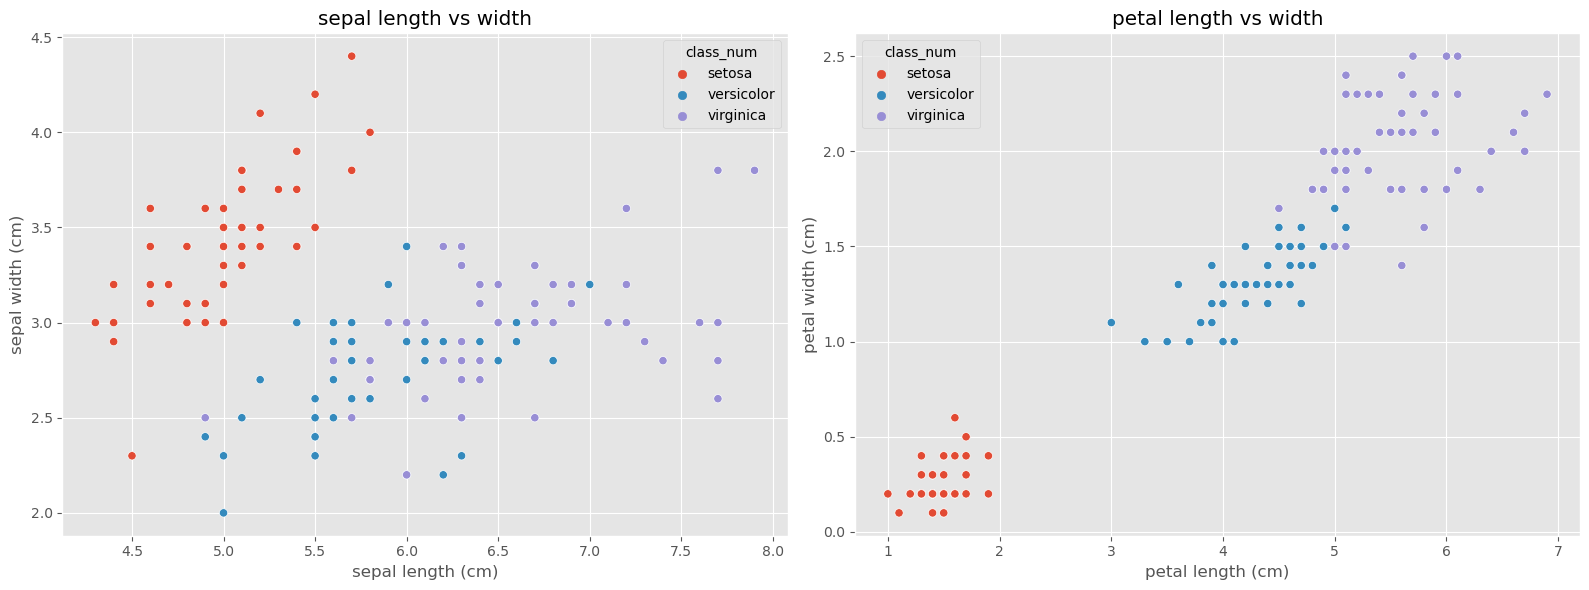

In [153]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(data=df, ax=ax1, x='sepal length (cm)', y='sepal width (cm)', hue='class_num')
ax1.set_title('sepal length vs width')

sns.scatterplot(data=df, ax=ax2, x='petal length (cm)', y='petal width (cm)', hue='class_num')
ax2.set_title('petal length vs width')
plt.tight_layout()
plt.show()

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [155]:
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx].unsqueeze(0), self.y[idx]


In [156]:
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

In [157]:
train_dataset.X.view(train_dataset.X.size(0),-1).size()

torch.Size([120, 4])

In [158]:
train_dataset.y.shape

torch.Size([120])

In [159]:
train_dataset.X[:2]

tensor([[-1.5065,  1.2492, -1.5676, -1.3154],
        [-0.1737,  3.0908, -1.2834, -1.0522]])

In [160]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [161]:
class Iris1DCNN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(8*3, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        return x

In [162]:
in_channels = 1
out_channels = 8
kernel_size = 2
stride = 1

model = Iris1DCNN(in_channels, out_channels, kernel_size, stride)

In [163]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
n_epochs = 20

In [164]:
num_batches = len(train_loader)
num_batches

8

In [165]:
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / num_batches
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss:.4f}")

model.eval()
correct = 0
total = 0


with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20, Loss: 0.8546
Epoch 2/20, Loss: 0.6602
Epoch 3/20, Loss: 0.5305
Epoch 4/20, Loss: 0.4486
Epoch 5/20, Loss: 0.3802
Epoch 6/20, Loss: 0.3379
Epoch 7/20, Loss: 0.2948
Epoch 8/20, Loss: 0.2519
Epoch 9/20, Loss: 0.2048
Epoch 10/20, Loss: 0.1779
Epoch 11/20, Loss: 0.1587
Epoch 12/20, Loss: 0.1432
Epoch 13/20, Loss: 0.1235
Epoch 14/20, Loss: 0.1082
Epoch 15/20, Loss: 0.1115
Epoch 16/20, Loss: 0.0888
Epoch 17/20, Loss: 0.0816
Epoch 18/20, Loss: 0.0800
Epoch 19/20, Loss: 0.0817
Epoch 20/20, Loss: 0.0764
Test Accuracy: 1.0000
